In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.max_columns = None

## Data Importation and Exploration

In [2]:
raw_data = pd.read_csv("Salaries.csv", low_memory = False)

In [3]:
df = raw_data.copy()

In [4]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [6]:
df.isnull().sum() * 100/len(df)

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.406985
OvertimePay           0.000000
OtherPay              0.000000
Benefits             24.324270
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64

In [7]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [8]:
df[df.Benefits.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36154,36155,SERENA HUGHES,SWIMMING INSTRUCTOR/POOL LIFEGUARD,0.0,0.0,4.17,NaN,4.17,4.17,2011,NaN,San Francisco,NaN
36155,36156,JOE BROWN JR,TRANSIT OPERATOR,0.0,0.0,0.3,NaN,0.30,0.30,2011,NaN,San Francisco,NaN
36156,36157,PAULETTE ADAMS,"STATIONARY ENGINEER, WATER TREATMENT PLANT",0.0,0.0,0.0,NaN,0.00,0.00,2011,NaN,San Francisco,NaN
36157,36158,KAUKAB MOHSIN,TRANSIT OPERATOR,0.0,0.0,0.0,NaN,0.00,0.00,2011,NaN,San Francisco,NaN


By looking at the benefit column we observe that the missing benefits are most likely to be a zero because the totalpay and totalpaybenefits are the same on those rows

In [9]:
## So we will fill the missing values in benefit with zeros
df.Benefits.fillna(0,inplace = True)

In [10]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [11]:
df[df.BasePay.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.0,149934.11,149934.11,2013,NaN,San Francisco,NaN
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.0,110485.41,131264.41,2013,NaN,San Francisco,NaN
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.0,8841.48,120000.00,128841.48,2013,NaN,San Francisco,NaN
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.0,106079.31,106079.31,2013,NaN,San Francisco,NaN
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110526,110527,Arthur L Curry,PS Aide Health Services,NaN,0.0,10.67,0.0,10.67,10.67,2013,NaN,San Francisco,NaN
110527,110528,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.0,5.56,5.56,2013,NaN,San Francisco,NaN
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.0,-2.73,0.00,-2.73,2013,NaN,San Francisco,NaN
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.0,-8.2,0.00,-8.20,2013,NaN,San Francisco,NaN


Looking at the missing values in basepay, we see that otherpay and totalpay are the same so the basepay is zero 

In [12]:
df.BasePay.fillna(0,inplace = True)

In [13]:
df.isna().sum() * 100/len(df)

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.000000
OvertimePay           0.000000
OtherPay              0.000000
Benefits              0.000000
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status               74.357232
dtype: float64

In [14]:
## We will drop the Notes column
df = df.drop("Notes", axis = 1)

In [15]:
df.isna().sum() * 100/len(df)

Id                   0.000000
EmployeeName         0.000000
JobTitle             0.000000
BasePay              0.000000
OvertimePay          0.000000
OtherPay             0.000000
Benefits             0.000000
TotalPay             0.000000
TotalPayBenefits     0.000000
Year                 0.000000
Agency               0.000000
Status              74.357232
dtype: float64

In [16]:
df[df.Status.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0,567595.43,567595.43,2011,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,0,332343.61,332343.61,2011,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
110530,110531,David P Kucia,Police Officer 3,0,0.0,0.0,-33.89,0.00,-33.89,2013,San Francisco,NaN
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco,NaN
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco,NaN


In [17]:
## We will drop the status column as well since we will not be needing it
df = df.drop("Status", axis = 1)

In [18]:
df.shape

(148654, 11)

In [19]:
df.drop_duplicates()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco


In [29]:
df[df["EmployeeName"] == "Not provided"]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.0,0.0,2014,San Francisco


In [32]:
filtered_df = df[~(df.isin(['Not provided']).any(axis=1))]

In [33]:
filtered_df.shape

(148650, 11)

In [34]:
filtered_df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco


In [35]:
filtered_df.describe()

,Id,TotalPay,TotalPayBenefits,Year
count,148650.000000,148650.000000,148650.000000,148650.000000
mean,74325.500047,74770.333901,93695.075969,2012.522603
std,42911.703176,50516.196009,62792.497391,1.117526
min,1.000000,-618.130000,-618.130000,2011.000000
25%,37163.250000,36169.955000,44073.337500,2012.000000
50%,74325.500000,71427.240000,92406.020000,2013.000000
75%,111487.750000,105842.960000,132877.992500,2014.000000
max,148654.000000,567595.430000,567595.430000,2014.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148654 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          148654 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 12.5+ MB


In [44]:
col = ["BasePay","OvertimePay","OtherPay","Benefits"]
filtered_df[col] =  filtered_df[col].astype(float)

C:\Users\Master\AppData\Local\Temp\ipykernel_11200\3361655282.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[col] =  filtered_df[col].astype(float)


In [45]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148650 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148650 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
 10  Agency            148650 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 13.6+ MB


In [47]:
filtered_df= filtered_df.drop("Agency",axis = 1)

In [49]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148650 entries, 0 to 148653
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148650 non-null  int64  
 1   EmployeeName      148650 non-null  object 
 2   JobTitle          148650 non-null  object 
 3   BasePay           148650 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          148650 non-null  float64
 7   TotalPay          148650 non-null  float64
 8   TotalPayBenefits  148650 non-null  float64
 9   Year              148650 non-null  int64  
dtypes: float64(6), int64(2), object(2)
memory usage: 12.5+ MB


In [51]:
filtered_df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000,148650.000000
mean,74325.500047,66055.506718,5066.059886,3648.767297,18924.742068,74770.333901,93695.075969,2012.522603
std,42911.703176,42885.919334,11454.380559,8056.601866,17165.229731,50516.196009,62792.497391,1.117526
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000
25%,37163.250000,32798.550000,0.000000,0.000000,0.000000,36169.955000,44073.337500,2012.000000
50%,74325.500000,64862.310000,0.000000,811.270000,23217.135000,71427.240000,92406.020000,2013.000000
75%,111487.750000,94609.715000,4658.175000,4236.065000,33468.980000,105842.960000,132877.992500,2014.000000
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


Now lets answer some question with the data

### 1.) Top 5 Job Titles with the highest base salary

In [57]:
highest_base_job = filtered_df.groupby("JobTitle")[["BasePay"]].mean().sort_values(by = "BasePay",ascending = False).head()

In [61]:
highest_base_job

,BasePay
JobTitle,
Chief of Police,309767.683333
"Chief, Fire Department",304232.340000
"Gen Mgr, Public Trnsp Dept",297769.413333
"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.000000
"Dep Dir for Investments, Ret",276153.765000


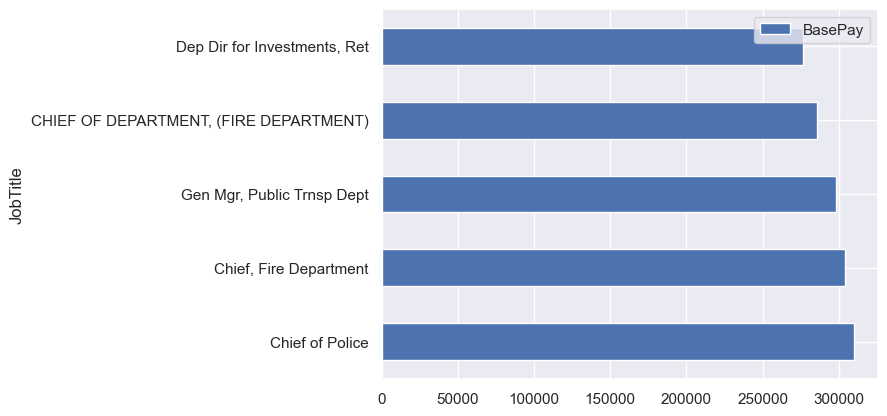

In [67]:
highest_base_job.plot(kind = "barh")
plt.show()

## 2)The Average of the BasePay

In [63]:
filtered_df.BasePay.mean()

66055.50671772621

In [64]:
filtered_df.BasePay.describe()

count    148650.000000
mean      66055.506718
std       42885.919334
min        -166.010000
25%       32798.550000
50%       64862.310000
75%       94609.715000
max      319275.010000
Name: BasePay, dtype: float64

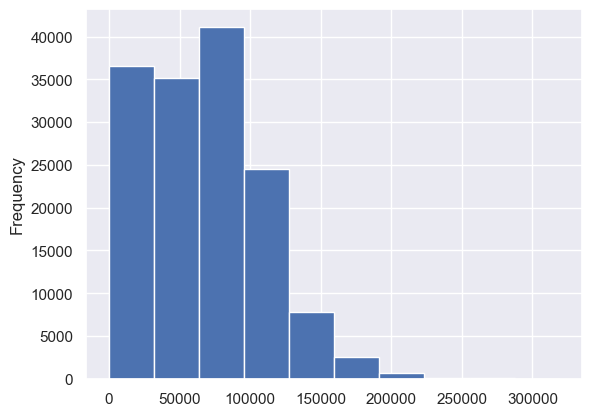

In [66]:
filtered_df.BasePay.plot(kind="hist")
plt.show()

## 3) The Average mean of Base Pay across the years

In [69]:
filtered_df.groupby("Year")[["BasePay"]].mean()

,BasePay
Year,
2011,63595.956517
2012,65436.406857
2013,68509.832156
2014,66564.421924


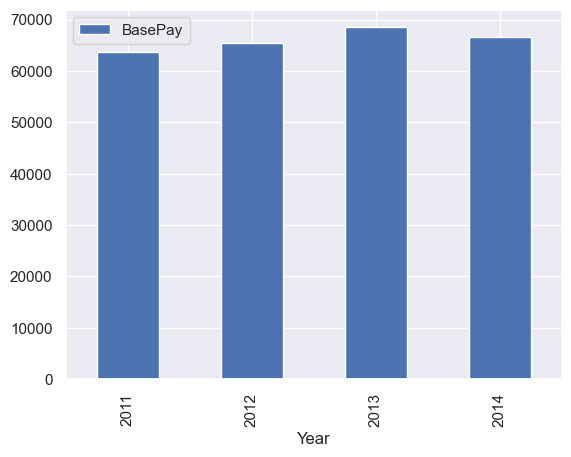

In [71]:
filtered_df.groupby("Year")[["BasePay"]].mean().plot(kind = "bar")
plt.show()

## 4) The 5 most common JobTitle

In [76]:
filtered_df["JobTitle"].value_counts().head()

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

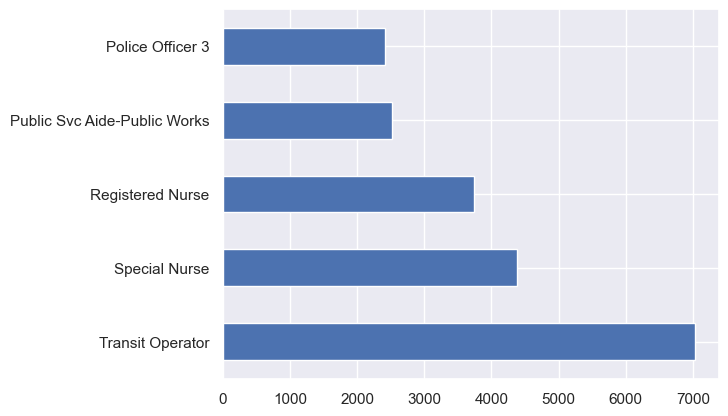

In [79]:
filtered_df["JobTitle"].value_counts().head().plot(kind="barh")
plt.show()